# 1.결정트리

## 1.1 로지스틱회귀로 와인분류하기

In [39]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head() # wine.tail()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [40]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [41]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [42]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [43]:
# 독립변수,종속변수
X_data=wine.drop(["class"],axis=1).to_numpy() #X_data=wine[["alcohol","sugar",0"pH"]]
Y_data=wine["class"].to_numpy()

In [44]:
X_data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [45]:
X_data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [48]:
#훈련세트와 검증 데이터로 바꾸
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=42)

In [49]:
print(X_train.shape,X_test.shape)

(5197, 3) (1300, 3)


In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,Y_train)
print(lr.score(train_scaled,Y_train))
print(lr.score(test_scaled,Y_test))

0.7808350971714451
0.7776923076923077


In [52]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정트리 

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,Y_train)
print(dt.score(train_scaled,Y_train))
print(dt.score(test_scaled,Y_test))

0.996921300750433
0.8592307692307692


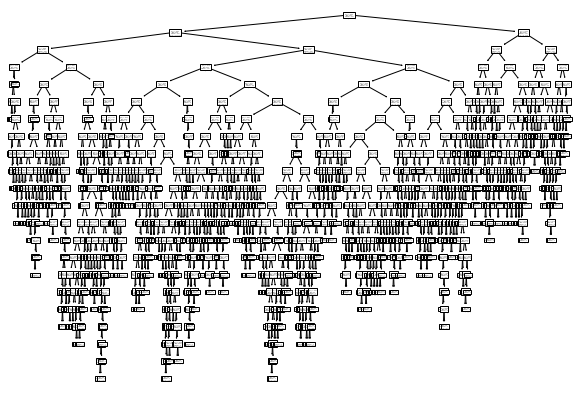

In [54]:
import matplotlib.pylab as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

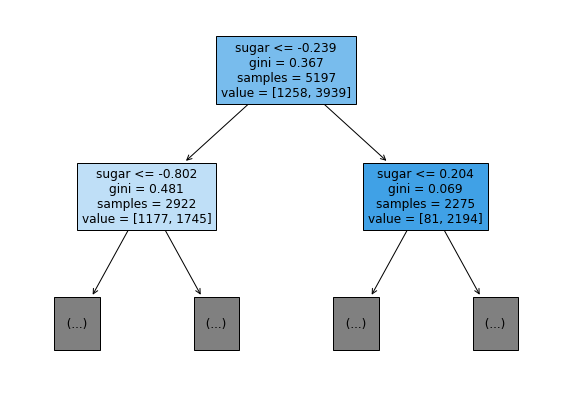

In [57]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=["alcohol","sugar","pH"])
plt.show()
#redwine 1258,wheiswuen 3939

In [58]:
1258+3939

5197

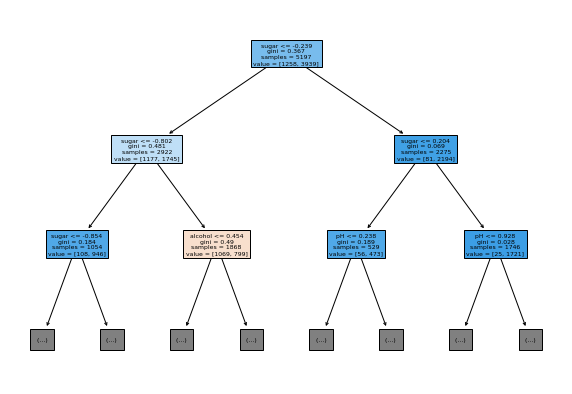

In [59]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=2,filled=True,feature_names=["alcohol","sugar","pH"])
plt.show()
#정확도를 정확하게 맞춘다

In [61]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,Y_train)
print(dt.score(train_scaled,Y_train))
print(dt.score(test_scaled,Y_test))

0.8454877814123533
0.8415384615384616


In [62]:
dt=DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(train_scaled,Y_train)
print(dt.score(train_scaled,Y_train))
print(dt.score(test_scaled,Y_test))

0.9291899172599577
0.8446153846153847


In [63]:
print(dt.feature_importances_)

[0.20271317 0.60004895 0.19723788]
